# Assignment 2: Linear and Logistic Regressions

Team Small Data: Timothy Ritter, Kelly Kang, Jihui "Todd" Tan, Yijie "Jerry" Yao
## BUS 20800: Big Data
## Due: 11:59 am on Apr 15, 2022

______

## Part I

## Problem 1: **Logistic Loss**



1.1 Calculate the derivative of the Sigmoid function. Can you write the derivative in terms of $\sigma(t)$ ?

$$
\sigma(t) = \frac{e^t}{1+e^t}
$$



   **Answer**:

We can rewrite sigmoid function as 
$$
\sigma(t) = \frac{e^t}{1+e^t} = \frac{1}{1+e^t}
$$

The derivative is:

$$\frac{\partial d \sigma(t)}{\partial t} = \frac{(1+e^{t})e^{t} - e^{t}(e^{t})}{(1+e^{t})^{2}}$$

$$= \frac{e^{t}}{(1+e^{t})^{2}} = \sigma(t) \cdot \frac{1}{1+e^{t}}$$

$$ = \sigma(t)(1-\sigma(t)) $$

1.2  Recall from the lecture, in linear regression setting, we have:
$$
Minimize \ squared \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$
    
As for the logistic regression, we also have a loss similar to the squared loss, namely logistic loss, defined as:
$$
    L = \sum_{i = 1}^{N} [log(1+e^{\beta^T x_i}) - y_ix_i^T \beta]
$$
    
Show that the following equivalence relationship for logistic regression holds.

$$
Minimize \ logistic \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$

**Answer**:


**Answer**:

First, we can rewrite the logistic likelihood function as the following.

$$L(\beta) = \Pi_{i=1}^{n} \sigma(x_{i}^{T}\beta)^{y_{i}} (1- \sigma(x_{i}^{T}\beta))^{1-y_{i}}$$

This is maximized by minimizing the deviance. Recall that $Dev(\beta) = -2\log L(\beta|data) + C$. Clearly, maximizing L will minimize Dev. We can plug in the equation for likelihood into the equation for deviance and simplify.

$$Dev = -2 \log (\Pi_{i=1}^{n} \sigma(x_{i}^{T}\beta)^{y_{i}} (1- \sigma(x_{i}^{T}\beta))^{1-y_{i}})$$

$$ Dev = -2 \sum_{i=1}^{n} y_{i}\log(\sigma(x_{i}^{T}\beta) + (1-y_{i})\log(1- \sigma(x_{i}^{T}\beta))$$

We can now show that this is proportional to the logistic loss. We replace the Sigmoid function with its actual value, distribute, and separate the log division.

$$ Dev = -2 \sum_{i=1}^{n} y_{i}[(\log e^{x_{i}^{T}\beta}) - \log (1+e^{x_{i}^{T}\beta})] + \log (1) - \log (1+e^{x_{i}^{T}\beta}) - y_{i}(\log(1) - \log (1+e^{x_{i}^{T}\beta}))$$

$$ Dev = -2 \sum_{i=1}^{n} y_{i}\log(e^{x_{i}^{T}\beta}) - \log(1+e^{x_{i}^{T}\beta})$$

$$ Dev = 2 \sum_{i=1}^{n} \log(1+e^{x_{i}^{T}\beta}) - y_{i}x_{i}^{T}\beta)$$

$$\implies Dev \propto \sum_{i=1}^{n} \log(1+e^{\beta^{T}x_{i}}) - y_{i}x_{i}^{T}\beta)$$ 

Thus, since deviance is proportional to logistic loss, maximizing likelihood will minimize deviance, which will also minimize logistic loss.





1.3 Calculate the derivative of the log likelihood with respect to weight $\beta$. 



**Answer**:


The log likelihood equation is

$$\log (L(\beta)) = \sum_{i=1}^{n} y_{i}(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}}) + (1-y_{i})(\frac{1}{1+e^{x_{i}^{T}\beta}})$$

We can distribute and use log rules to rewrite this as 

$$\sum_{i=1}^{n}y_{i}x_{i}^{T}\beta - \ln(1+e^{x_{i}^{T}\beta})$$

The first derivative with respect to $\beta$ is

$$ \frac{\partial \log(L(\beta))}{\partial \beta} = \sum_{i=1}^{n} y_{i}x_{i}^{T} - \frac{x_{i}^{T}e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}}$$

1.4 Redo the exercise 1.3 but with logistic loss, are the results the same?

**Answer**:

Using the logistic loss equation from above, we can easily see that the derivative is

$$\frac{\partial L}{\partial \beta} = \sum_{i=1}^{n} \frac{x_{i}^{T}e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}}- y_{i}x_{i}^{T}$$

This is the negative of the previous result. Thus, our results are the same as before since deviance is negatively related to likelihood, meaning that deviance will be directly proportional to this equation.

______

## Problem 2: **Classification via Logistic Regression** 


2.1 Logistic regression is a popular linear classifier, that assigns a label 0 or 1 to individuals. Show the following equivalence: 
$$
{\beta}^T x>0\iff P(Y = 1|X = x)> P(Y=0|X=x),   \nonumber
$$

which implies that the decision boundray of a logistic regression is 
$$
{\beta}^T x = 0.
$$



**Answer**:


Recall that logistic regression outputs a probability of realizing $Y=1$.

$P(Y=1|x) = \frac{e^{x^{T}\beta}}{1+e^{x^{T}\beta}}$

The predictions are binary. Thus, in the case where $P(Y = 1|X = x)> P(Y=0|X=x)$, we would predict that $Y=1$. If not, we predict $Y=0$. 

To be precise, there is an underlying function, $g(\beta^{T} x) = \frac{1}{1+e^{-\beta^{T} x}} = P(Y = 1)$. When $\beta^{T} x > 0$ it is implied that $P(Y = 1|X = x)> P(Y=0|X=x)$. Thus, we can write the following.

$\beta^{T}x > 0 \iff \text{predict} \, 1$

$\beta^{T}x < 0 \iff \text{predict} \, 0$

This evidently shows that the decision boundary of a logistic regression is $\beta^{T}x = 0$, where the decision to predict 0 or 1 is arbitrary.

# Part II

In [1]:
# Set up codes
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(15,8)}, font_scale=1.2)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_moons, make_circles, make_blobs

## Problem 3: Understanding the decision boundary



This exercise helps you visualize the decision boundary of a binary classification problem. 

### Part 1. Data Generating Process

We first generate five distinct datasets used in this execise for you. You don't need modify any codes here.

In [2]:
# DGP
random_seed = np.random.seed(0)

n_samples   = 1500

# Generate 2-dimensional x variables and y lables that follow a standard linear logistic regression model. Half of 
# the y labels are 1s. 
balanced    = make_blobs(n_samples=n_samples, random_state=random_seed, centers=2, center_box = (-4,4))

# Generate circle shaped data
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Generate Moon shaped data
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)

# Generate 2-dimensional random x variables with randomly generated labels
label = [0] * n_samples
for i in np.random.randint(0,n_samples,int(n_samples/2)):
    label[i] = 1
    
no_structure = np.random.rand(n_samples, 2), label

# Generate 2-dimensional x variables and y lables that follow a standard linear logistic regression model. In this DGP,
# the y-labels are rather imbalanced, that is, 100 y labels are 1s, whereas 1500 labels are 0s.
imbalanced = make_blobs(n_samples = [n_samples, 100],random_state = random_seed, cluster_std = [1.5,0.1],center_box = (-3,3))


from Logistic_simulation import Generate_data

# Prepare data in dataframe format for the following analysis.
df_circle       = Generate_data(noisy_circles)
df_moon         = Generate_data(noisy_moons)
df_balanced     = Generate_data(balanced)
df_no_structure = Generate_data(no_structure)
df_imbalanced   = Generate_data(imbalanced)

Run the following cell to visualize the data generated above.

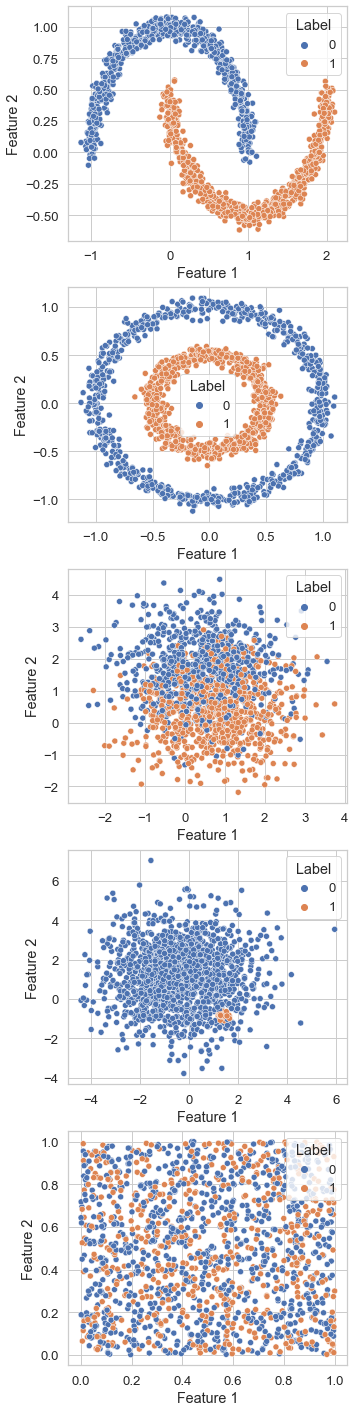

In [3]:
# Input data visualization
plt.figure(figsize = (5,25))

# Moon shape dataset
plt.subplot(5,1,1)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_moon)

# Circle shape dataset
plt.subplot(5,1,2)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_circle)

# Balanced dataset
plt.subplot(5,1,3)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_balanced)

# No structure dataset
plt.subplot(5,1,5)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_no_structure)

# Imbalanced dataset
plt.subplot(5,1,4)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_imbalanced)

plt.show()

### Part 2. Verify Gradients

In this section, we implement and verify the gradient formula derived in Part I. We will use this gradient later in Part 3 to implement logistic regression on our own.




Please finish the Get_gradient_formula in Logistic_simulation.py before running the next cell.

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from Logistic_simulation import Get_gradient_formula, mapFeature, Get_gradient_numeric


Let's calculate gradient using any dataset generated from above. 


In [6]:
# First, choose the x variables from a dataset, e.g., df_balanced. Make sure the dimension of X is 1500 x 2 or 1600 x 2 
# and the dimension of y is 1500 x 1 or 1600 x 1. Pick an arbitrary 2x1 vector theta, at which point you evaluate the 
# gradients.

X = np.array(df_balanced[['Feature 1', 'Feature 2']])

y = np.array(df_balanced[['Label']])

np.random.seed(2021)
theta = np.random.randn(len(X[0]), 1)


In [7]:
print(X.shape)
print(y.shape)
print(theta.shape)

(1500, 2)
(1500, 1)
(2, 1)


In [8]:
# Evaluate gradient of the log likelihood (function of data) at theta:  

gradient_formula = Get_gradient_formula(theta, X, y)

Recall that the gradient is defined as:

$$
\nabla_x = \frac{\partial f(x,\cdots)}{\partial x} =\lim_{h\to 0} \frac{f(x+h,\cdots)-f(x-h,\cdots)}{2h}
$$

Now we use this method for check your results. Run the following cell to compare gradient_formula and gradient_numeric below.

In [9]:
gradient_formula

array([[ 347.17922032],
       [1028.25846559]])

In [10]:
gradient_numeric = Get_gradient_numeric(theta,X,y)

In [11]:
from Logistic_simulation import Gradient_check
Gradient_check(gradient_formula, gradient_numeric)

[[0.00029476]
 [0.000873  ]]
[[1.96504676e-07]
 [5.81997957e-07]]


8.478737174613556e-07

______

### Part 3. Visualize the Decision Boundary

With the above preparation, we are ready to visualize the decision boundary. 

In [12]:
# Visualize the decision boundary
from Logistic_simulation import Generate_boundary

Choose an appropriate degree (e.g., 1, 2, ...) to run logistic regression with $x_1$, $x_2$, $x_1^2$, $x_2^2$, ...., $x_1^{degree}$, $x_2^{degree}$ and their cross products as regressors $x$ for each dataset, respectively. If you choose the right degree, the lables will be seperated by the hyperplane $x^T \beta = 0$.  

[1.36304382 3.85538318]
[1.         1.36304382 3.85538318]
[ 4.01618064  2.76980439 -6.52178279]


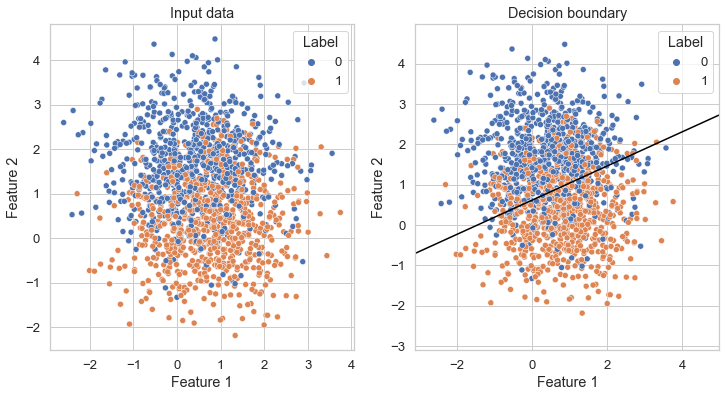

In [13]:
# Balanced dataset
degree = 1
Generate_boundary(df_balanced,degree)

[0.5420736  0.04110829]
[1.         0.5420736  0.04110829 0.29384379 0.02228372 0.00168989]
[-70.77959693  57.98365087 -79.88476168 -23.29565535  -6.29417425
 -50.49720288]


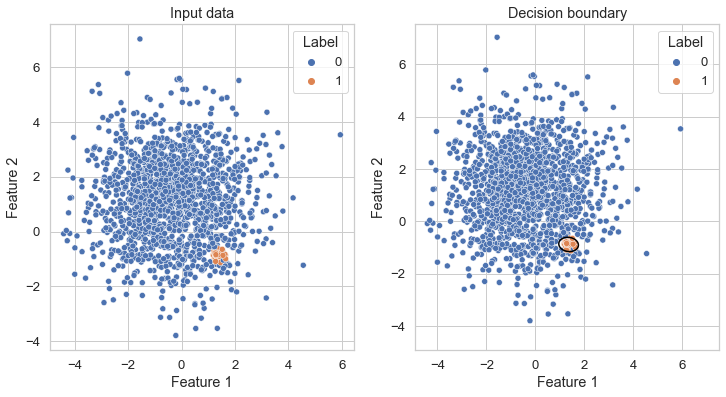

In [14]:
# Imbalanced dataset
degree = 2
Generate_boundary(df_imbalanced,degree)

[-0.58114677  0.8636144 ]
[ 1.         -0.58114677  0.8636144   0.33773157 -0.50188672  0.74582983]
[ 21.97637989  -0.24887444  -0.15668605 -37.21344646   0.84033935
 -38.04873586]


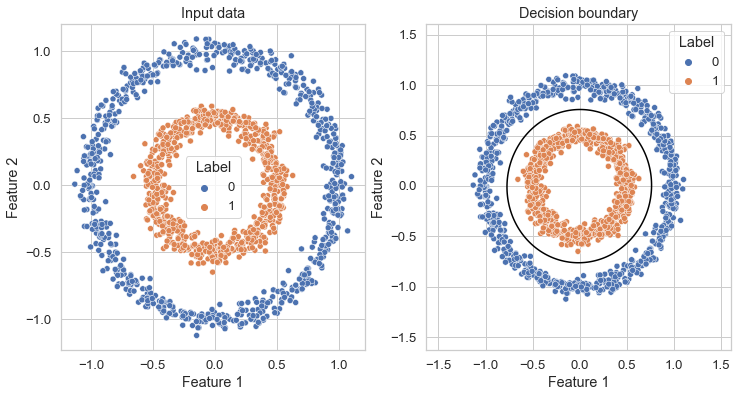

In [15]:
# Circle dataset
degree = 2
Generate_boundary(df_circle,degree)

[-0.94024993  0.28656455]
[ 1.         -0.94024993  0.28656455  0.88406993 -0.26944229  0.08211924
 -0.83124669  0.2533431  -0.07721261  0.02353246]
[ 17.00452312 -16.21639859 -13.71596083 -30.99695959  -3.24753863
   0.41702097  22.39460562 -10.48891508  16.20782354 -17.38503878]


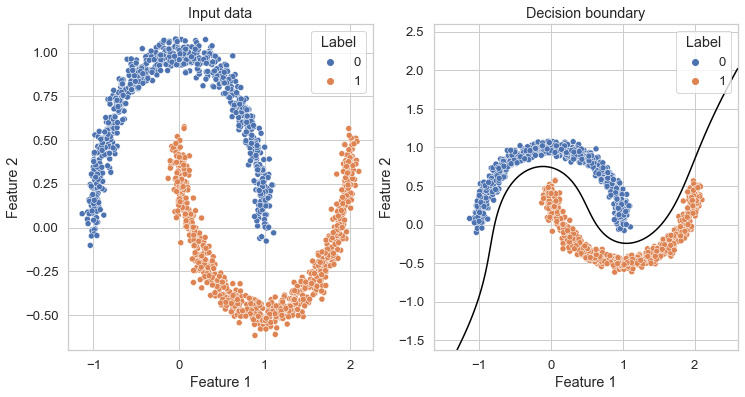

In [16]:
# Moon dataset
degree = 3
Generate_boundary(df_moon,degree)

[0.9174347  0.47658793]
[1.         0.9174347  0.47658793 0.84168642 0.4372383  0.22713605
 0.77219233 0.40113759 0.2083825  0.1082503 ]
[ -0.88446545   3.13653037  10.17961092   1.48624754 -12.18522042
 -15.82953196  -2.76254776   8.01099444   5.16984692   8.81437101]


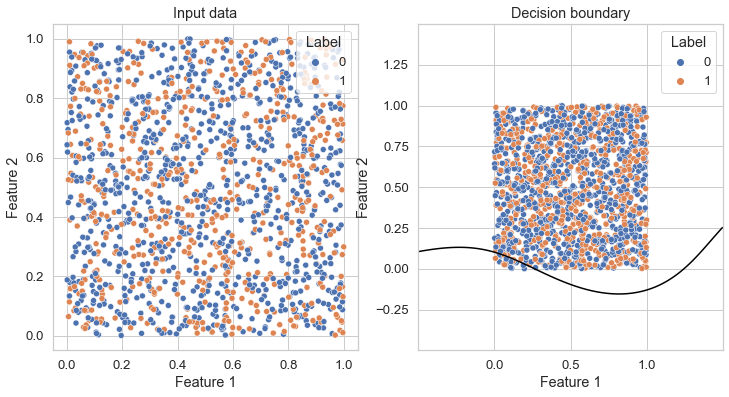

In [17]:
# Dataset without structure
degree = 3
Generate_boundary(df_no_structure,degree)

What conclusions can you make?

**Answer**:

Logistic regression is a powerful tool to conduct binary classification. However, depnding on the structure and nature of the data, some data pre-processing specifically projecting the original two dimensional feature into a higher dimensions through generating polynomial regressors of degree n. 

Different datasets also has the optimal the boundary that matches our expectation in terms of polynomial of given degrees. For dataset with the circuler linear boundary, a degree 2 polynomial is what's expected to best match the shape. For dataset for example the doubl moons with a curvature linear boundary, a degree 3 polynimal is what's expected to best match the shape.

______

## Problem 4: Default Prediction

### Background

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub used to be the world's largest peer-to-peer lending platform before it closed this business.


The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


When a person applies for a loan, there are two types of decisions that could be taken by the company:
* **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

 1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
 2. Current: Applicant is in the process of paying the instalments. These candidates are not labelled as 'defaulted'.
 3. Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan


* **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transnational history of those applicants with the company and so this data is not available with the company (and thus not in this dataset)


In this exercise, you will work as a group of data scientists for LendingClub to find out the driving factors behind loan default. And use these variables to identify risky loan applicants.

We will mainly focus on the binary classification case for simplicity, 'Fully Paid' and 'Charged Off'. 

And for each variable, you can see its description in Variable_description.pdf.


In [18]:
# Load training data
_DATA_DIR = './Data'
loan_data = pd.read_csv('%s/loan_train.csv'%(_DATA_DIR), index_col =0)




### Part 1: Exploratory Data Analysis

1. It is easier to write functions to visualize different types of data. Finish these functions in EDA.py, Get_category_visualize, Get_numeric_visualize, Get_map_visualize(df =loan_data, x = 'addr_state',y ='loan_status'), Get_text_visualize. Use these functions to visualize the data.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# some preprocessing for this section [only run once]

# work with init_rate (convert init_rate to float)
for i in range(0, len(loan_data)):
    temp =  loan_data.iloc[i,2]
    loan_data.iloc[i,2] = float(temp.replace('%', 'e-2'))

loan_data["int_rate"] = loan_data.int_rate.astype(float)

In [21]:
loan_data.issue_d = pd.to_datetime(loan_data["issue_d"])

In [22]:
# convert init_rate
loan_data['revol_util'] = loan_data['revol_util'].str.replace("%", "")
loan_data['revol_util'] = loan_data['revol_util'].astype(float)

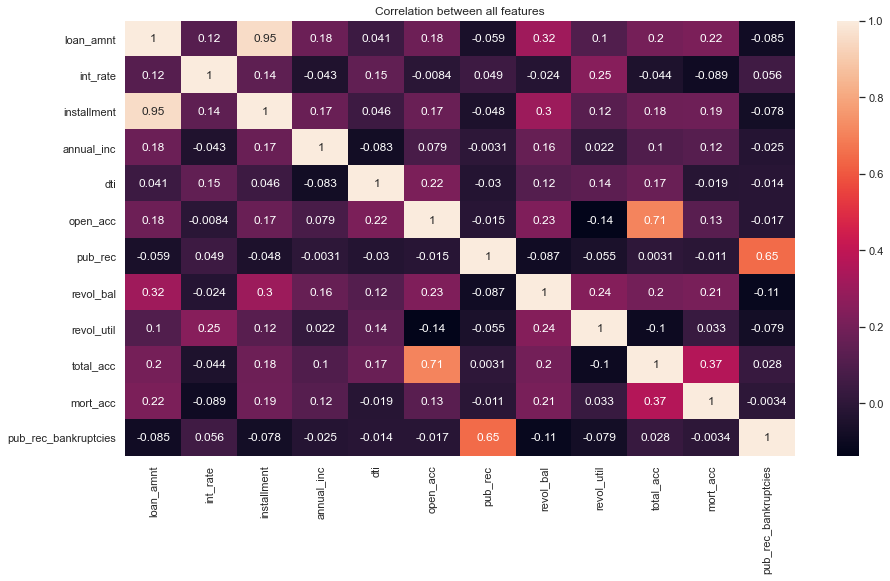

In [23]:
from EDA import Get_correlation_matrix

Get_correlation_matrix(df= loan_data)

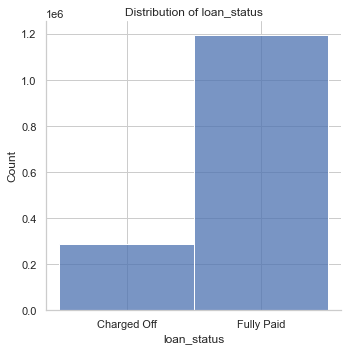

In [24]:
from EDA import Get_simple_distribution

Get_simple_distribution(df= loan_data, x= 'loan_status')

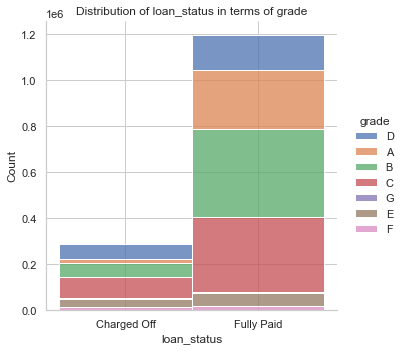

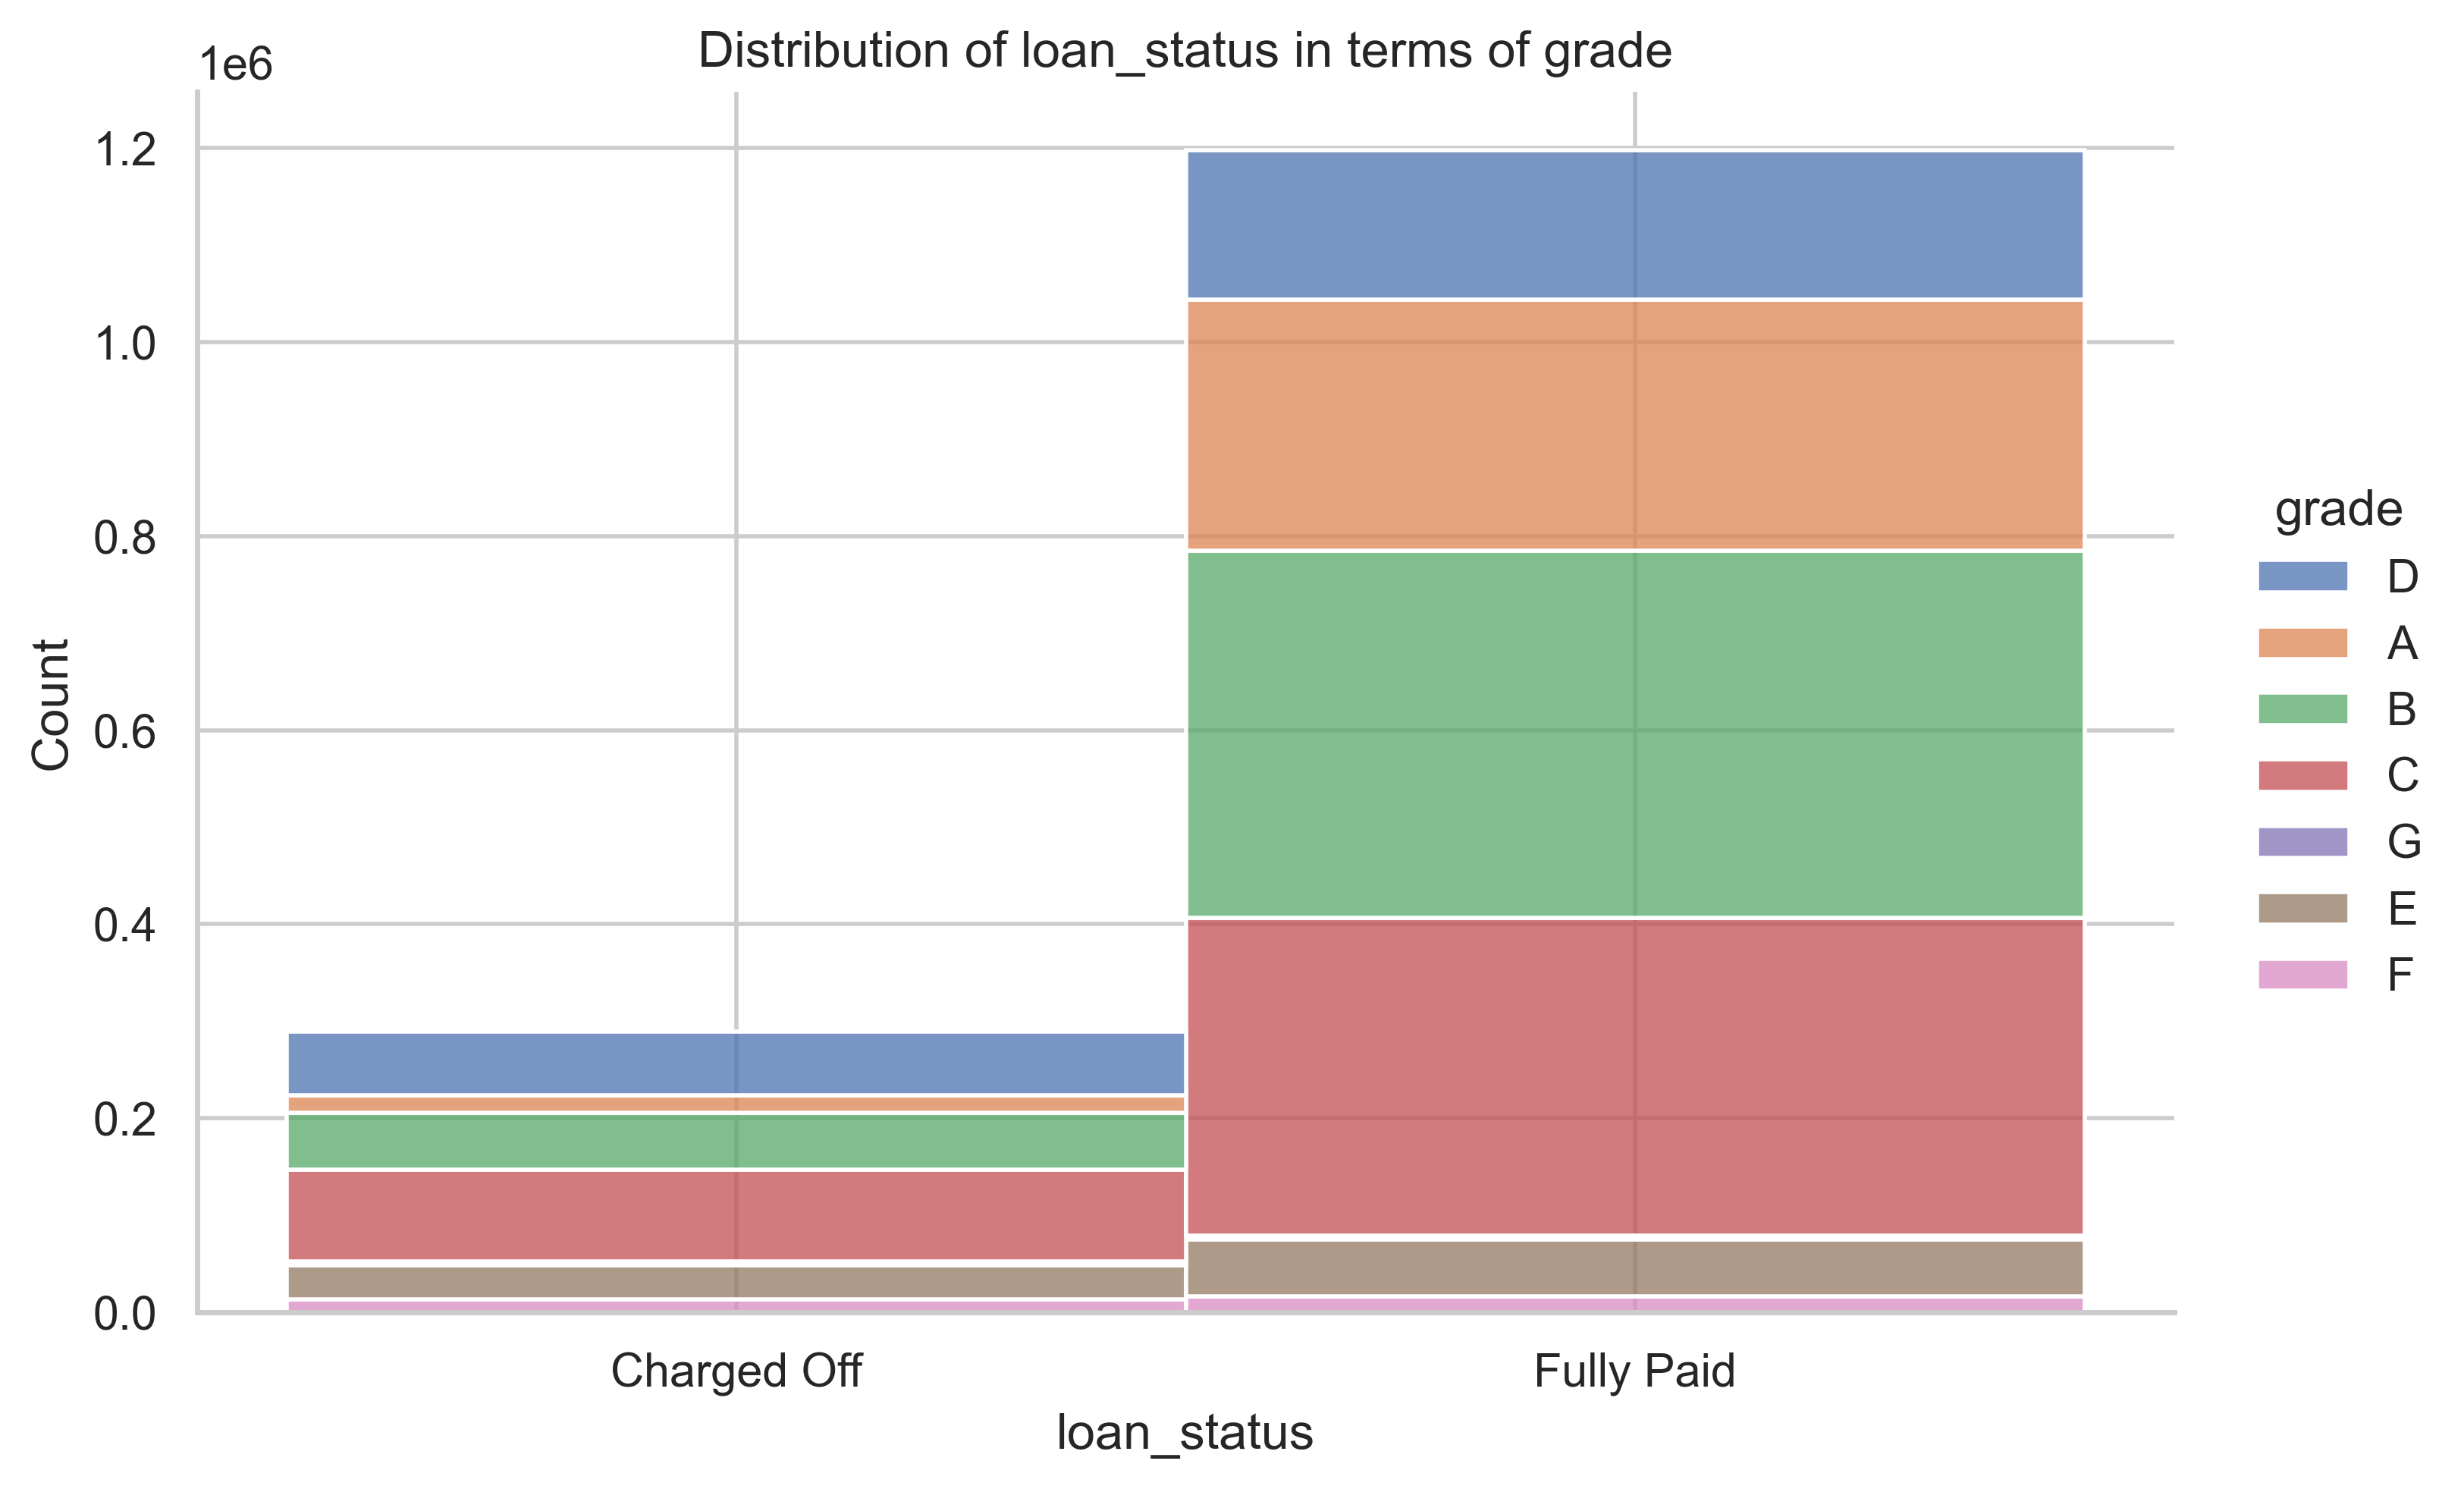

In [25]:
# Visualize categorical data
from EDA import Get_category_visualize

# Here x = grade is just for your reference
Get_category_visualize(df = loan_data, x = 'grade', y = 'loan_status')


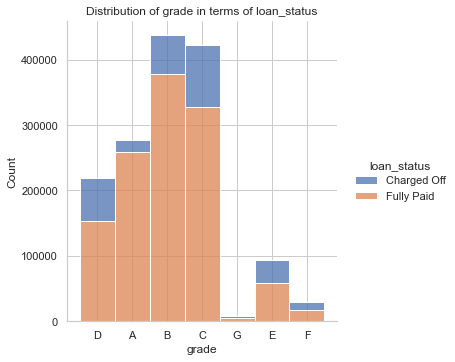

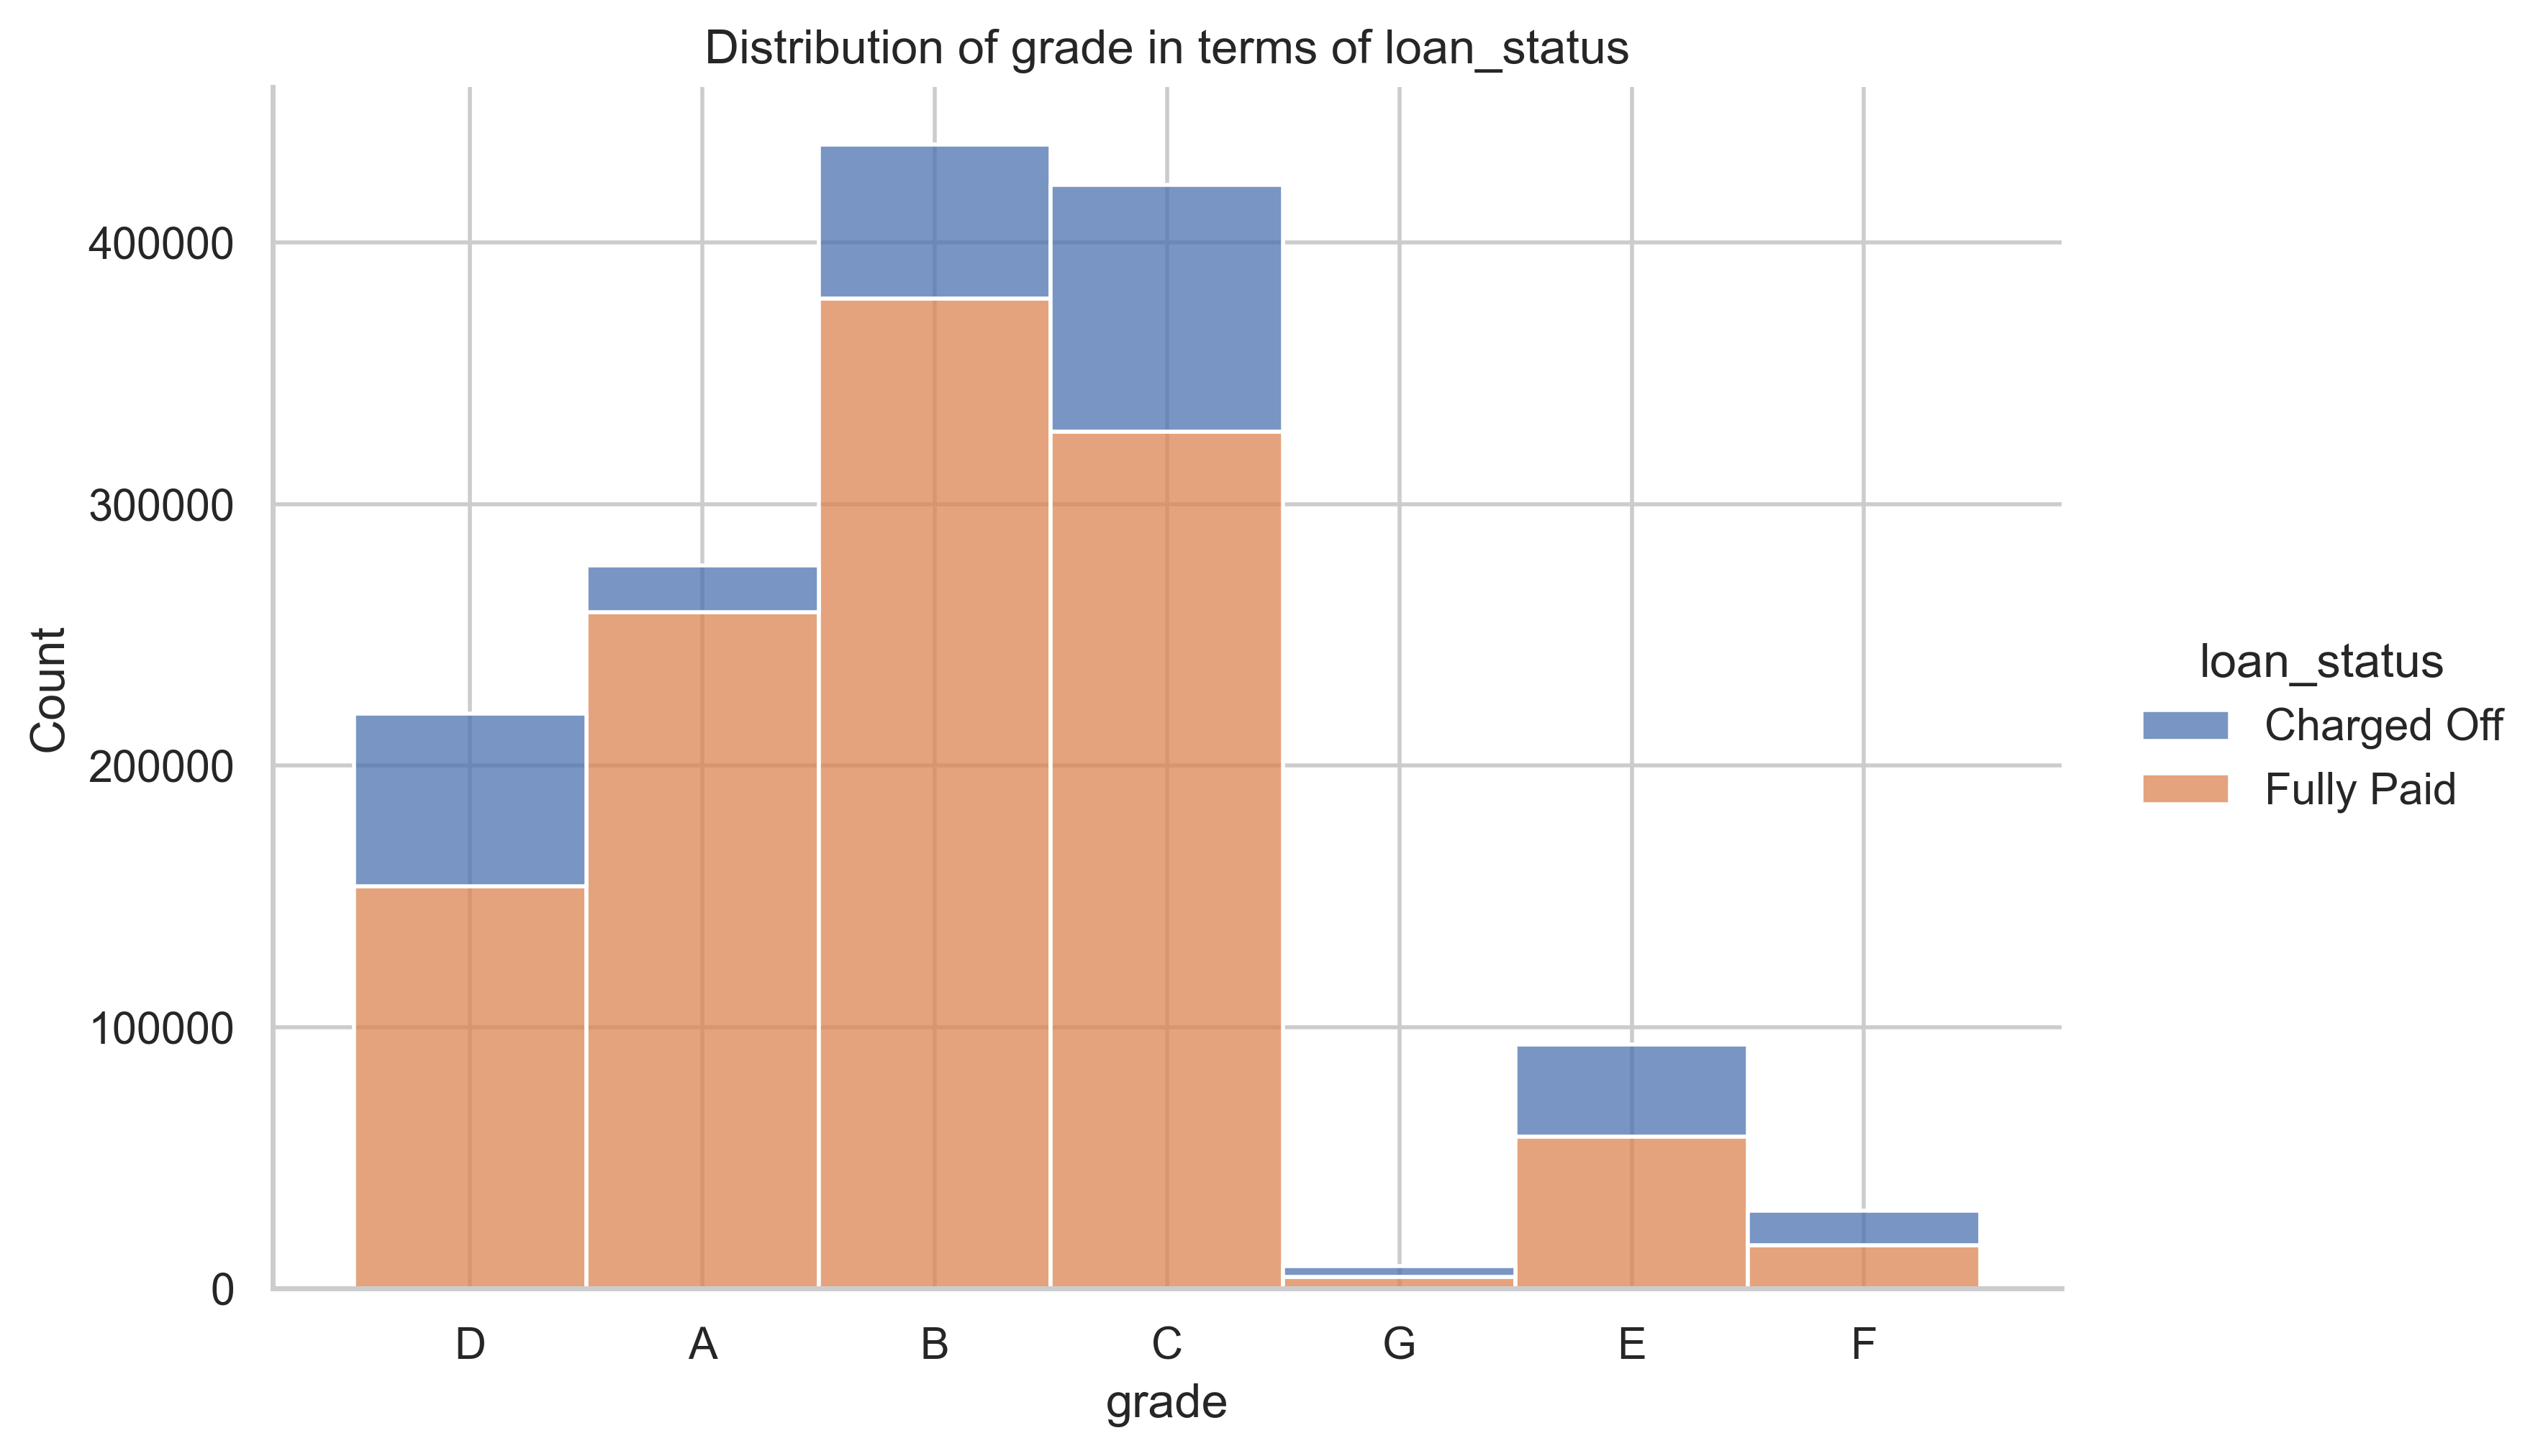

In [26]:
# Visualize categorical data
from EDA import Get_category_visualize

# Here x = grade is just for your reference
Get_category_visualize(df = loan_data, x = 'loan_status', y = 'grade')



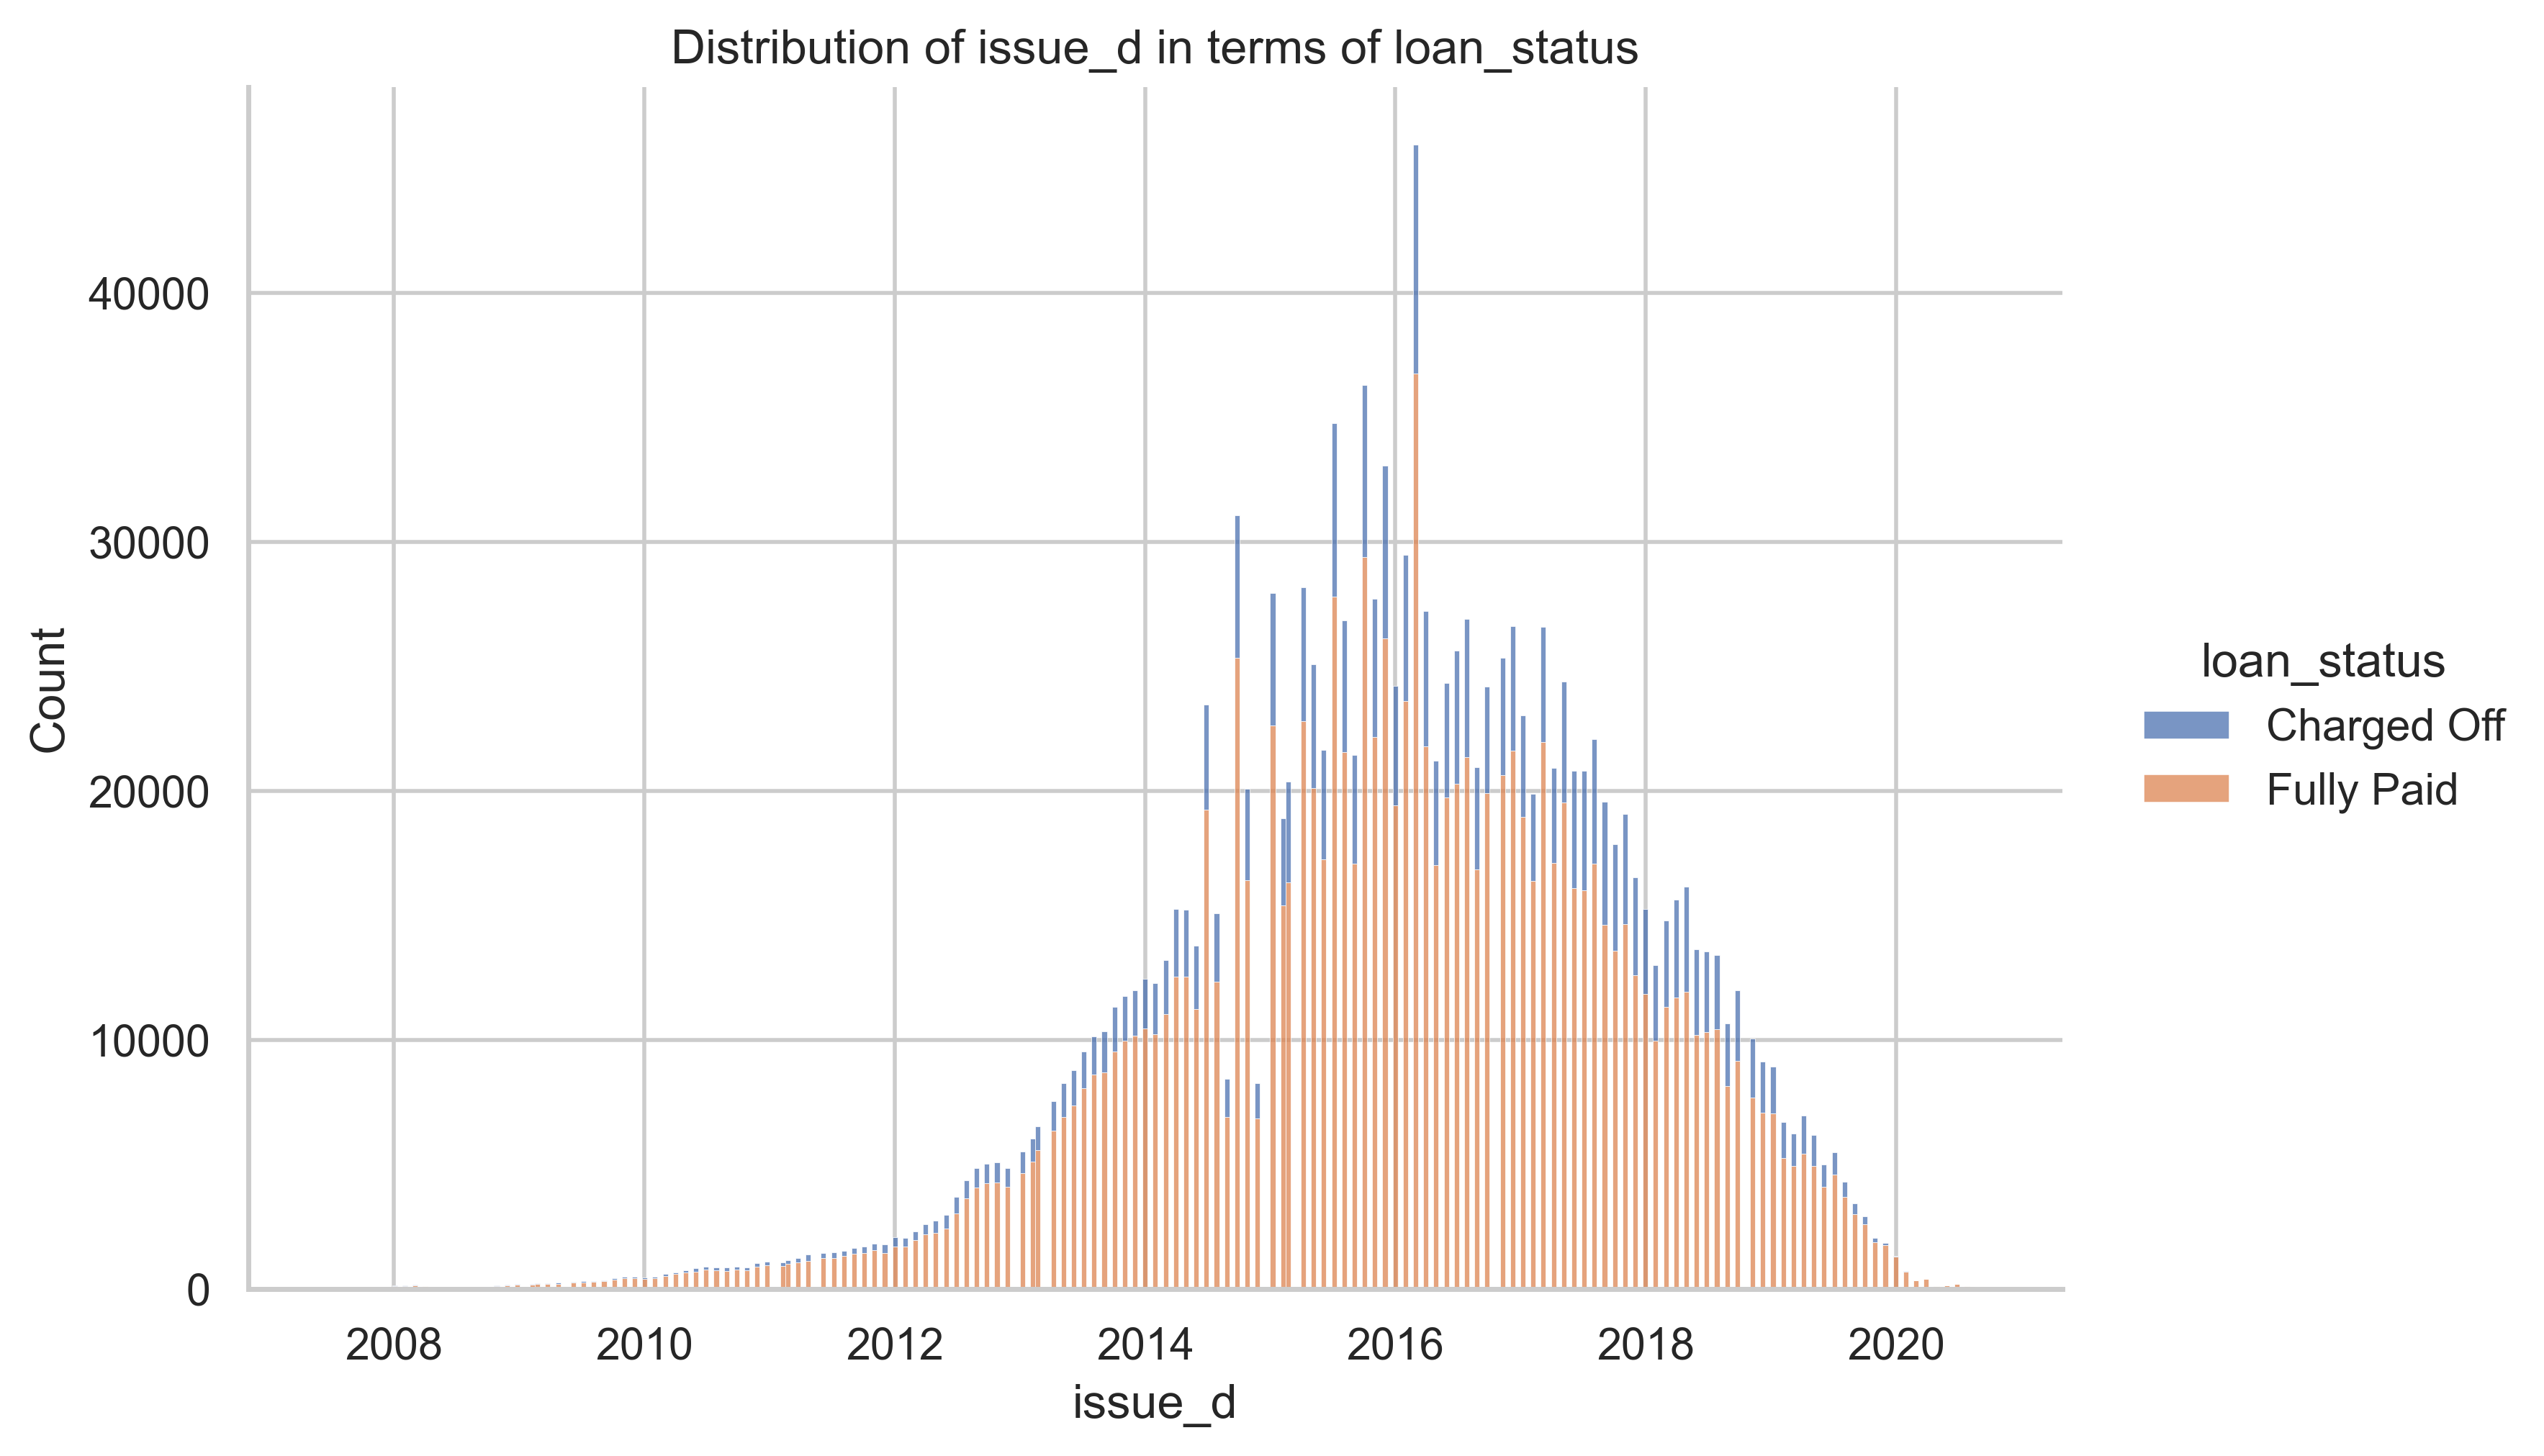

In [27]:


# Visualize categorical data
from EDA import Get_category_visualize

# Here x = grade is just for your reference
Get_category_visualize(df = loan_data, x = 'loan_status', y = 'issue_d', increase_size= True)




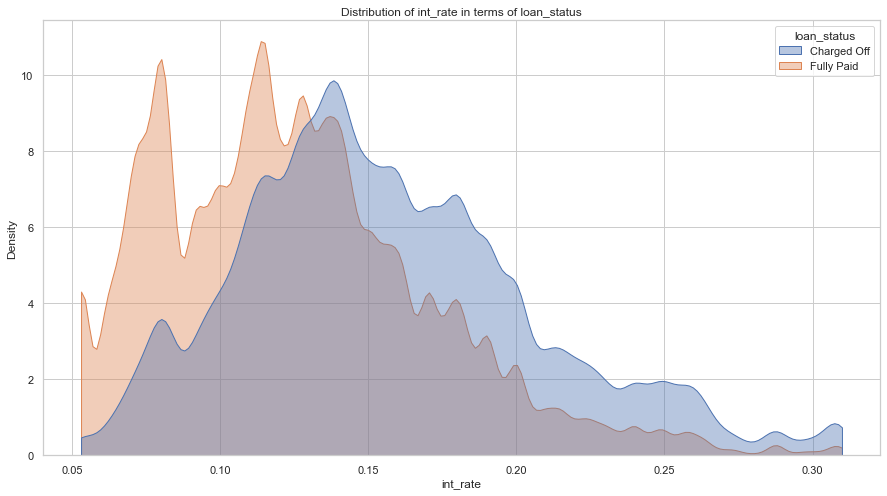

In [28]:
# Visualize numerical data
from EDA import Get_numeric_visualize

# Here x = int_rate is just for your reference
Get_numeric_visualize(df = loan_data, x = 'int_rate', y = 'loan_status')



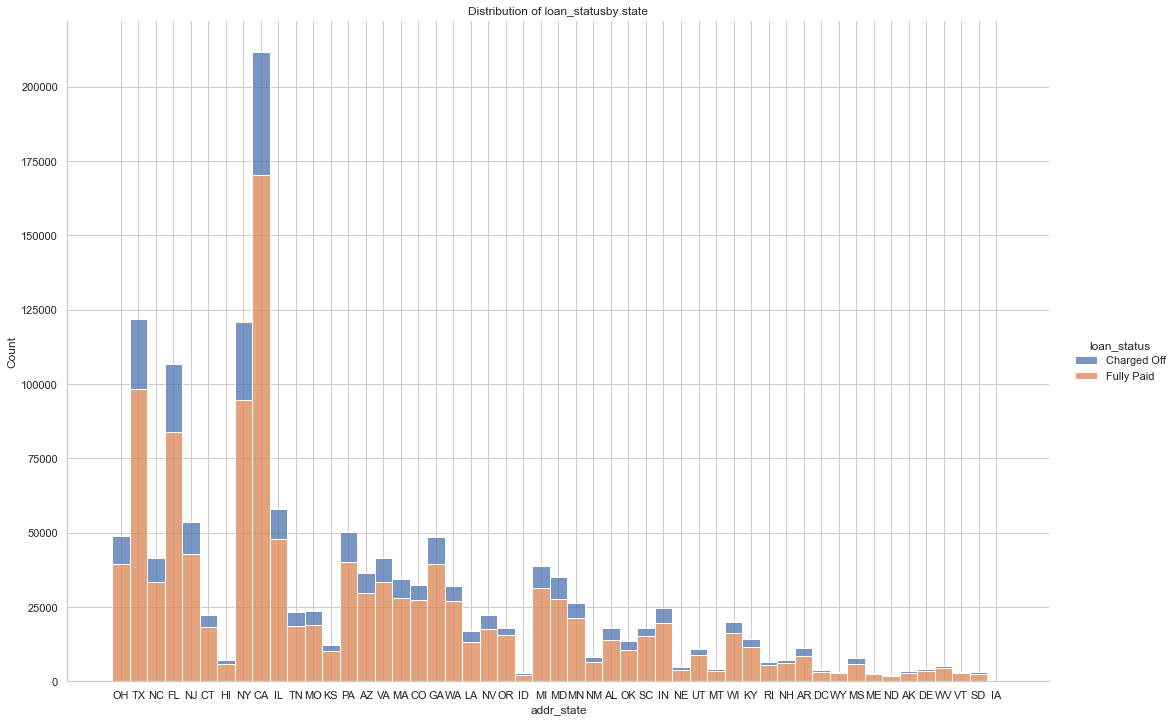

In [29]:
# Visualize spatial data
from EDA import Get_map_visualize
Get_map_visualize(df =loan_data, x = 'addr_state',y ='loan_status')

(253531, 28)


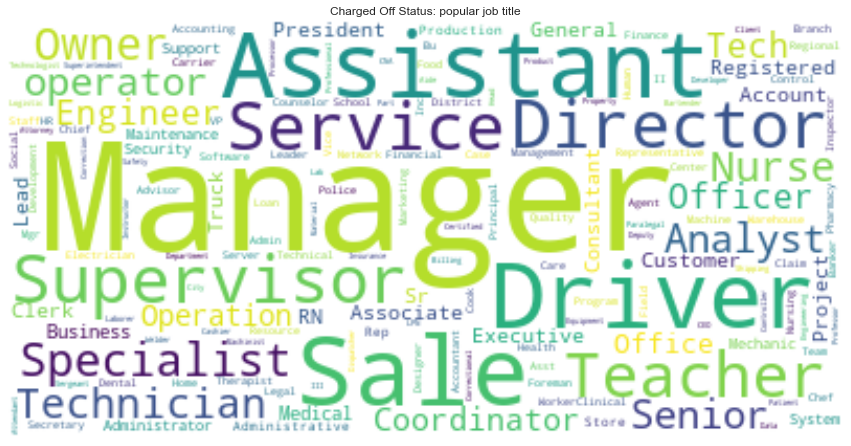

(1078135, 28)


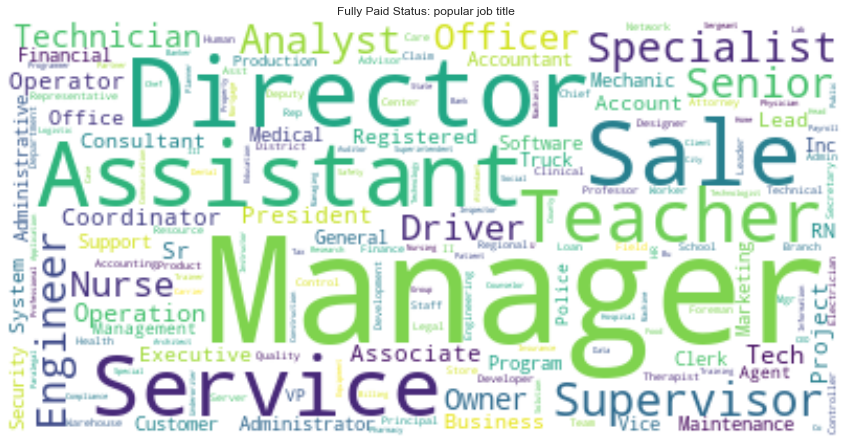

In [30]:
# Visualize text data
from EDA import Get_text_visualize



# Here x = emp_title is just for your reference
Get_text_visualize(df = loan_data,x = 'emp_title' ,y = 'loan_status')

In [31]:
# show the category by state
loan_data.groupby(['addr_state', 'loan_status'])['loan_status'].count()

addr_state  loan_status
AK          Charged Off      604
            Fully Paid      2584
AL          Charged Off     3477
            Fully Paid     12433
AR          Charged Off     2308
                           ...  
WI          Fully Paid     14707
WV          Charged Off      676
            Fully Paid      3919
WY          Charged Off      480
            Fully Paid      2420
Name: loan_status, Length: 102, dtype: int64

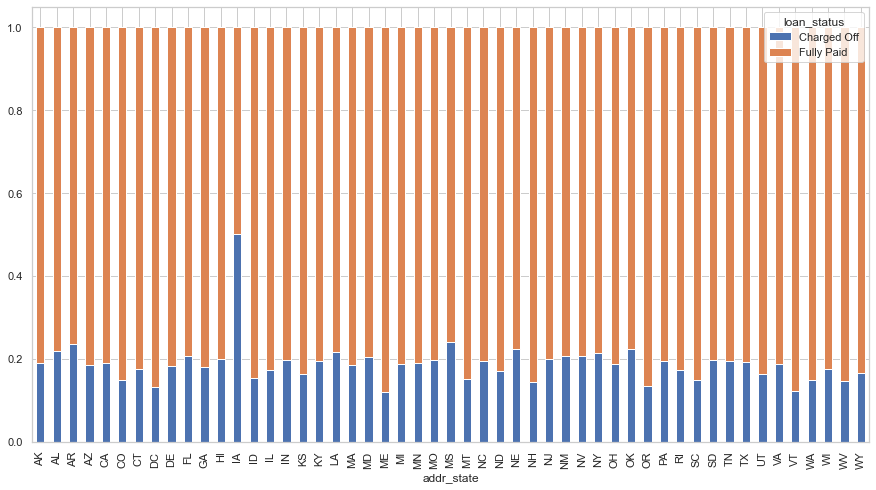

In [32]:
from EDA import Get_state_percentage_visulize
Get_state_percentage_visulize(loan_data, 'loan_status')

In [33]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

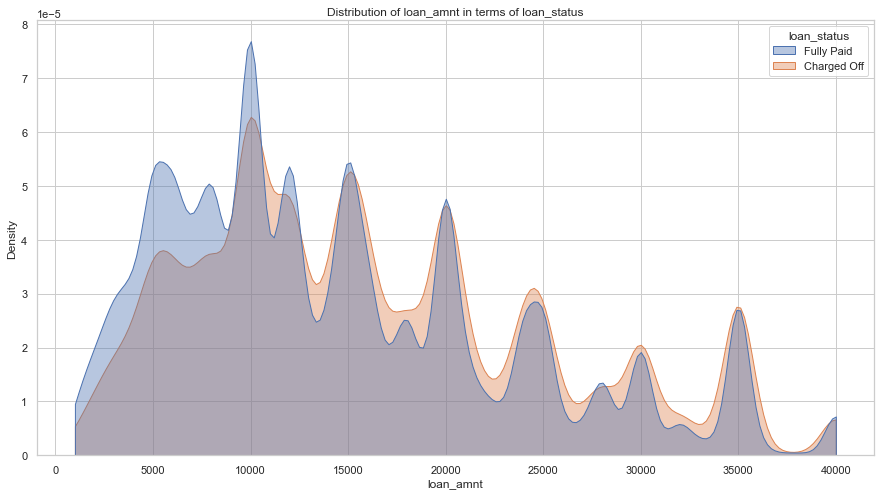

In [34]:
Get_numeric_visualize(df = loan_data, x = 'loan_amnt', y ='loan_status')

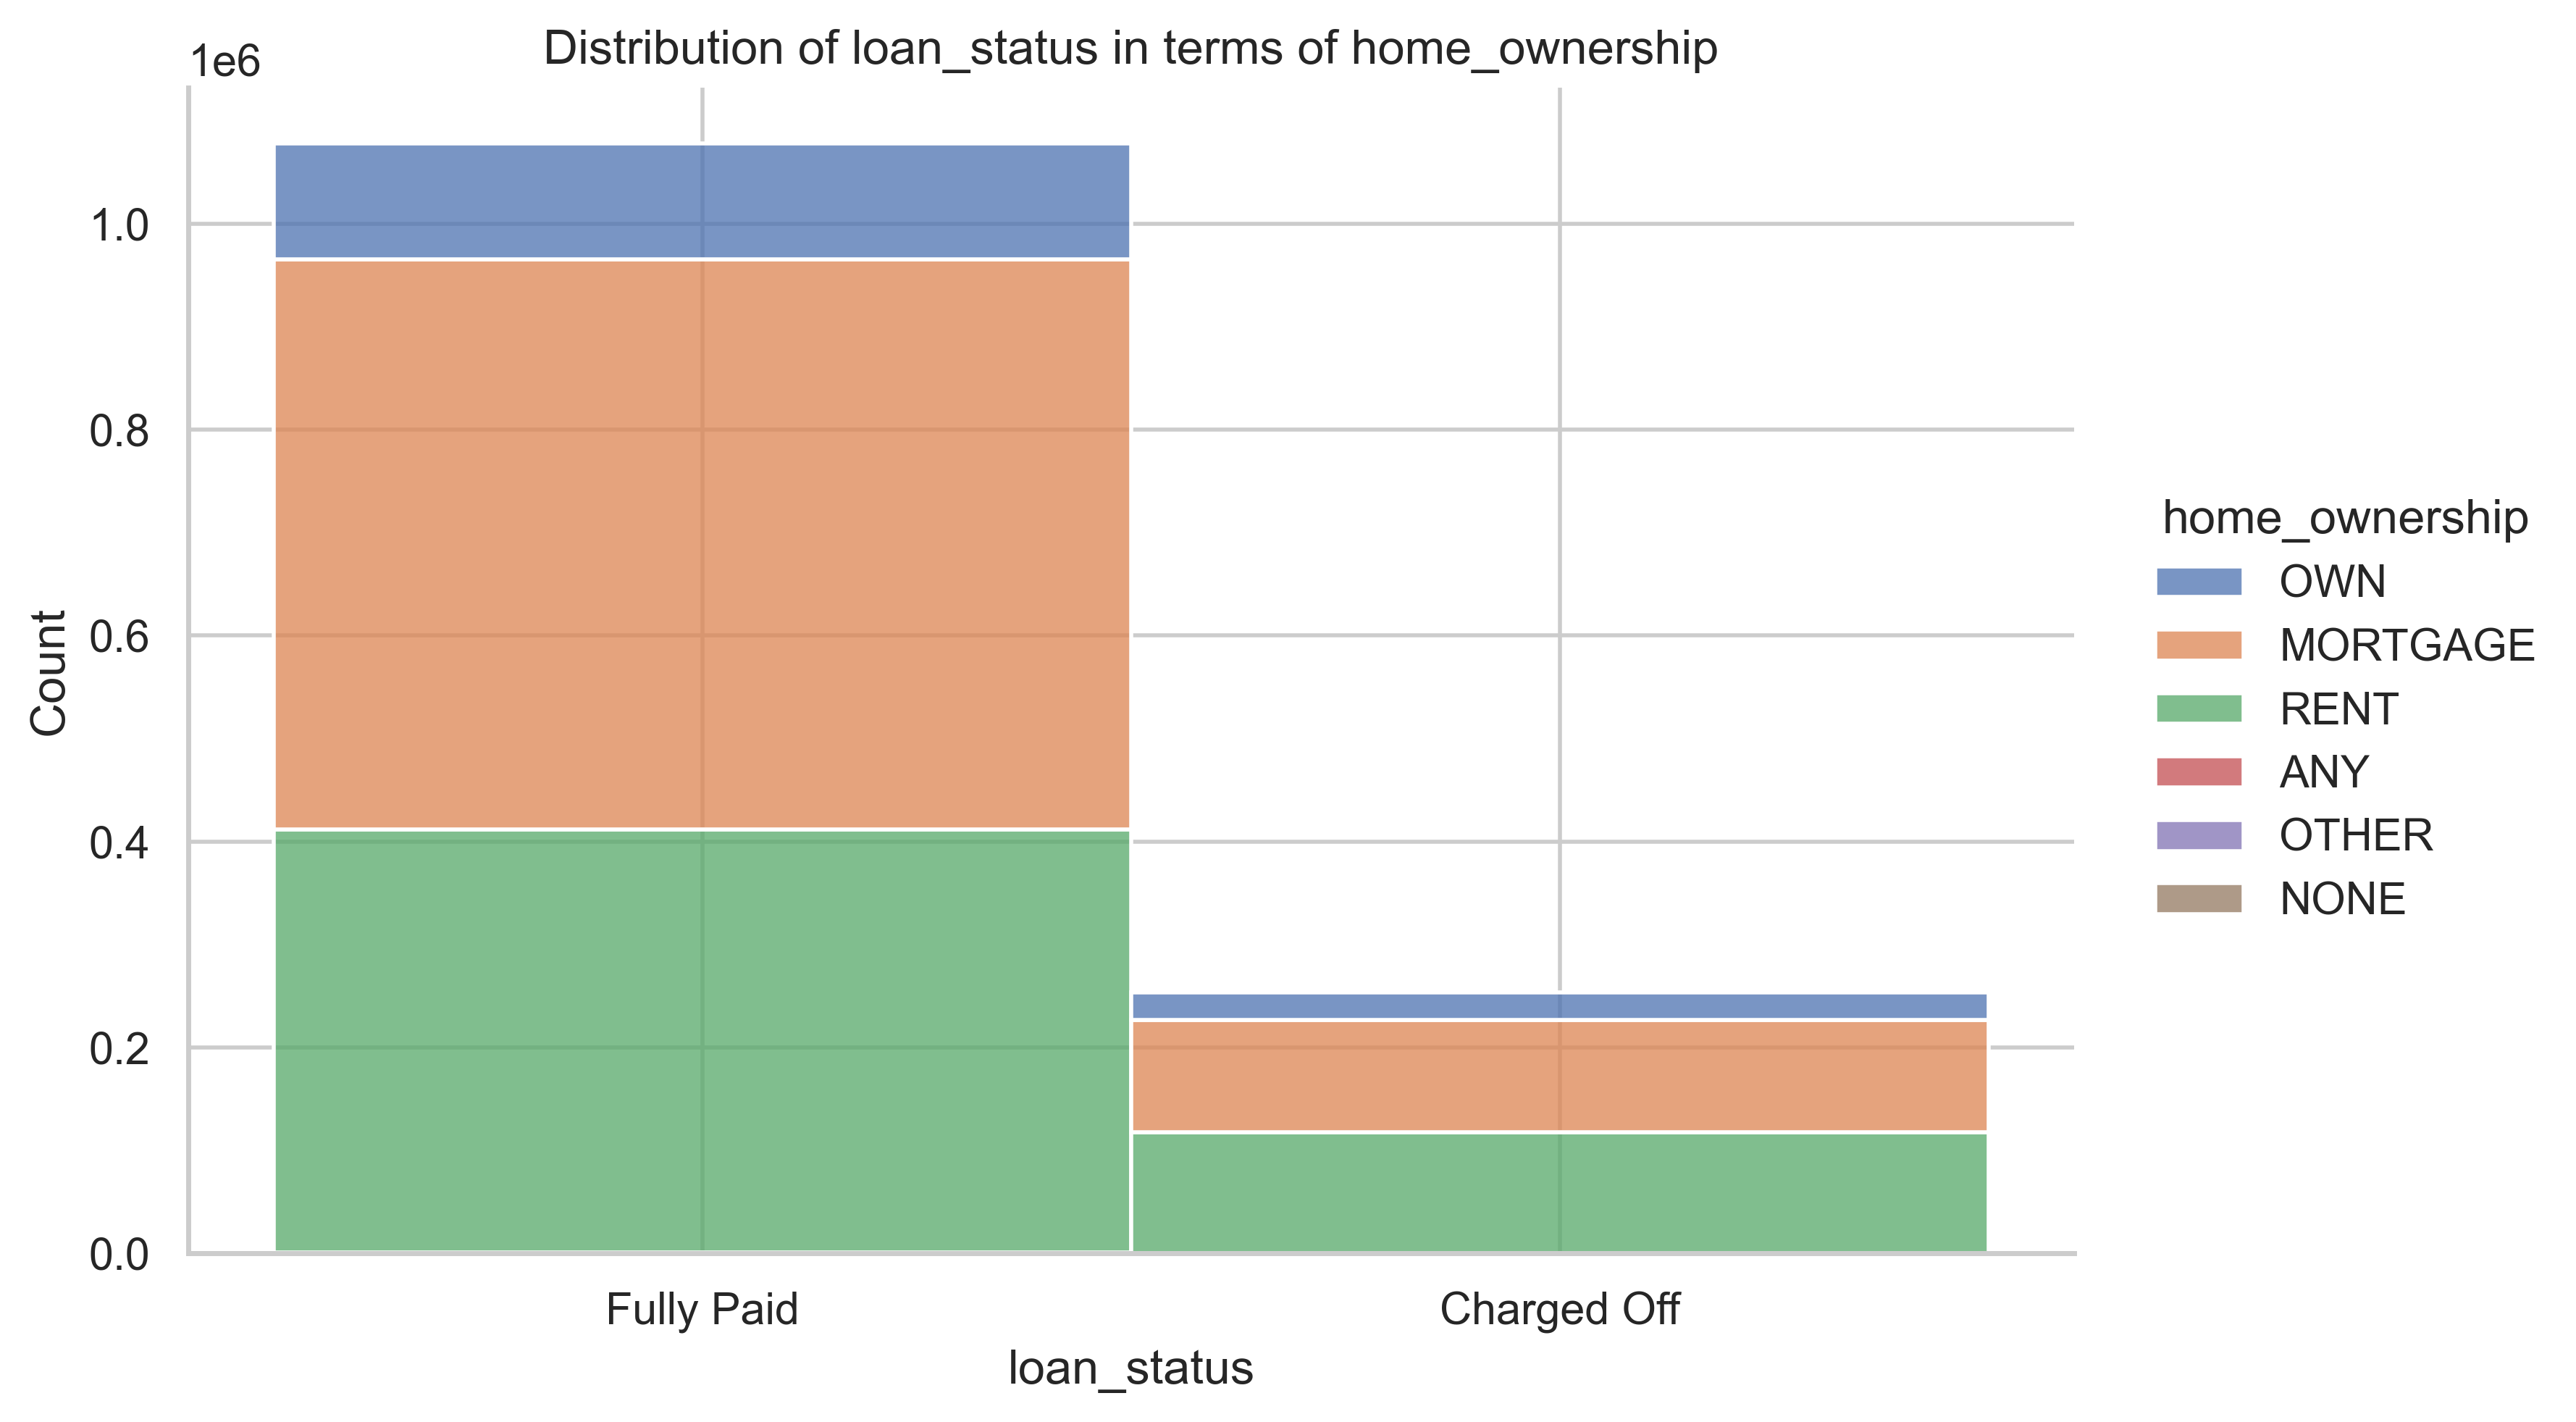

In [35]:
Get_category_visualize(df = loan_data, x = 'home_ownership', y = 'loan_status', increase_size = True)

Based on the EDA, could you answer the following questions?

 + Does this dataset has balanced labels?
 
 The dataset clearly does not have balanced labels. Far more of the loans are fully paid instead of charged off. 

 
 
 
 + For the numerical type in this dataset, is there some strong co-linearity?
 
 In general, there is not strong collinearity between variables. We can see from the heatmap above that most variables exhibit a weak correlation between them, with some exceptions. Namely, as we would expect, payment installments are highly correlated with the loan amount. Total account and open account are also related as we would expect. Overall, there is not much collinearity to worry about

 + Which state has the highest default rate? How about the lowest?
 
 As a percentage, it appears that Mississippi has the highest default rate. It is more difficult to tell which state has the lowest default rate, but it looks like Maine is the winner. 
 
 + Which job is associated with highest default rate?
 
 Manager is related to both default and fully paying. It appears that assistant is most related to default, though it is also significant for paying. 

 + What pattern can you find in loan grade and loan status?
 
 Evidently, loans with higher grades tend to be less likely to default. There are also generally more loans issued with better grades, which makes sense since it is hard to find mortgage lenders willing to take on very significant risk. 

 
 + Which year has the highest total amount of loans issued?
 
 2016 appears to have the highest number of loans issued. The trend increases going into 2016 before decreasing. 

 
 + Which variables might be good indicators for loan default?
 
 As a proportion, it looks like home ownership makes borrowers more likely to repay. Installment also seems very important. At a first glance, it looks like those with large installments who are very wealthy are likely to pay, but smaller installments may actually come with more risk because despite a higher rate, those borrowers are poorer in the first place. Term does not seem very important. Perhaps most important is loan amount. Smaller loan amounts appear more likely to repay based on the density plot. Overall, loan amount and installment look the most significant. 

### Part 2: Data Cleaning For Training Data

2. Here we offer you an example how we do the cleaning procedure on each variable. You can have your own cleaning procedure.

In [36]:
# Load training data again
_DATA_DIR = './Data'
loan_data = pd.read_csv('%s/loan_train.csv'%(_DATA_DIR), index_col =0)

# work with init_rate (convert init_rate to float)
for i in range(0, len(loan_data)):
    temp =  loan_data.iloc[i,2]
    loan_data.iloc[i,2] = float(temp.replace('%', 'e-2'))

loan_data["int_rate"] = loan_data.int_rate.astype(float)

In [57]:
#Remove % from revol_util and cast as int
loan_data['revol_util'] = loan_data['revol_util'].str.replace("%", "")
loan_data['revol_util'] = loan_data['revol_util'].astype(float)

In [37]:
# Missing values
# Look at the percentage of missing values for each variable
loan_data.isna().sum(axis = 0)/ loan_data.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.993611
emp_length              6.230678
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.153376
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.075036
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                2.541677
pub_rec_bankruptcies    0.037989
loan_status             0.000000
dtype: float64

In [38]:
# Emp_title, Title have too many categories, not suitable for construct dummy variable
# Delete these two variabls
print(len(loan_data.emp_title.unique()))
print(len(loan_data.title.unique()))

loan_data.drop(columns = ['emp_title','title'],axis = 1, inplace=True)

383625
50998


In [39]:
# Change term value from categorical to numerical value
term_values = {' 36 months': 36, ' 60 months': 60}
loan_data['term'] = loan_data.term.map(term_values)

In [40]:
# Change employment length from categorical into numerical value
emp_length_values = {'< 1 year': 0, 
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}
loan_data['emp_length'] = loan_data.emp_length.map(emp_length_values)

In [41]:
# Varriable grade offers the same information as sub_grade
loan_data.drop(columns = ['grade'], inplace = True)

In [42]:
# Zip code offers the same information as addr_state
loan_data.drop(columns = ['zip_code'], inplace = True)

In [43]:
# Get dummy variable, be careful with the colinearity
dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','addr_state']
loan_data = pd.get_dummies(loan_data, columns=dummy_col, drop_first=True)

In [44]:
# Issue_d has the data leakage problem, wa can't get access to the issuance date until we know its true loan_status
loan_data.drop('issue_d', axis=1, inplace=True)

In [45]:
# Care about year information, not month
loan_data['earliest_cr_line'] = loan_data.earliest_cr_line.apply(lambda x: int(x[-4:]))

In [46]:
# For variable mort_acc, fill the missing value with median
loan_data.mort_acc.fillna(loan_data.mort_acc.median(), inplace = True)

In [47]:
# Drop the other missing values
loan_data.dropna(inplace = True)

In [48]:
# Change predicted value into binary numerical value 0,1
status_values = {'Fully Paid': 0, 'Charged Off': 1}
loan_data['loan_status'] = loan_data.loan_status.map(status_values)

### Part 2.5: Data Cleaning For Testing Data (we rename X_test to X_Unseen)

We clean the test data jut like how the examples did to training data. We load the loan_test.csv to a dataframe called **X_unseen** data.

In [49]:
X_unseen = pd.read_csv('./Data/loan_test.csv')

In [50]:
# Data cleaning procedure for X_test

# Emp_title, Title have too many categories, not suitable for construct dummy variable
# Delete these two variabls

X_unseen.drop(columns = ['emp_title','title'],axis = 1, inplace=True)

# Change term value from categorical to numerical value
term_values = {' 36 months': 36, ' 60 months': 60}
X_unseen['term'] = X_unseen.term.map(term_values)

# Change employment length from categorical into numerical value
emp_length_values = {'< 1 year': 0, 
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}
X_unseen['emp_length'] = X_unseen.emp_length.map(emp_length_values)

# Varriable grade offers the same information as sub_grade
X_unseen.drop(columns = ['grade'], inplace = True)

# Zip code offers the same information as addr_state
X_unseen.drop(columns = ['zip_code'], inplace = True)

# Get dummy variable, be careful with the colinearity
dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','addr_state']
X_unseen = pd.get_dummies(X_unseen, columns=dummy_col, drop_first=True)

# Issue_d has the data leakage problem, wa can't get access to the issuance date until we know its true loan_status
X_unseen.drop('issue_d', axis=1, inplace=True)

# Care about year information, not month
X_unseen['earliest_cr_line'] = X_unseen.earliest_cr_line.apply(lambda x: int(x[-4:]))

# For variable mort_acc, fill the missing value with median
X_unseen.mort_acc.fillna(X_unseen.mort_acc.median(), inplace = True)

# Drop the other missing values
X_unseen.dropna(inplace = True)

#Remove % from interest rate and cast as int
X_unseen['int_rate'] = X_unseen['int_rate'].str.replace("%", "")
X_unseen['int_rate'] = X_unseen['int_rate'].astype(float)
X_unseen['int_rate'] = X_unseen['int_rate']/100


#Remove % from revol_util and cast as int
X_unseen['revol_util'] = X_unseen['revol_util'].str.replace("%", "")
X_unseen['revol_util'] = X_unseen['revol_util'].astype(float)

#drop unnanmed
X_unseen.drop('Unnamed: 0', axis=1, inplace=True)




### Part 2.6: Other Data Preprocessing step

In [51]:
# show all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


#### Sanity check to make sure our loan_data and unseen data is the same format

In [58]:
loan_data

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
118664,40000.0,36,0.0667,1229.06,5.0,80000.00,4.37,2003,18.0,0.0,13573.0,15.1,36.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
173625,6000.0,36,0.0662,184.23,6.0,72000.00,22.37,1994,17.0,0.0,5991.0,6.2,39.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52317,15000.0,36,0.1235,500.73,10.0,42916.68,25.64,1995,11.0,0.0,13173.0,78.9,16.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
171574,23000.0,36,0.1531,800.80,10.0,60634.20,30.96,2006,7.0,0.0,28922.0,76.3,21.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64808,10000.0,36,0.0662,307.04,3.0,71500.00,11.08,2005,13.0,0.0,7679.0,17.5,22.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70482,3300.0,36,0.1433,113.32,10.0,23000.00,5.01,2005,4.0,0.0,2950.0,34.3,6.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0

In [59]:
X_unseen

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,10650.0,36,0.0603,324.14,9.0,150000.0,15.25,1991,15.0,0.0,39473.0,61.3,41.0,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,20000.0,60,0.1602,486.58,9.0,54000.0,21.10,2006,17.0,0.0,12913.0,17.3,26.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39700.0,36,0.0721,1229.64,10.0,150000.0,24.64,1993,13.0,0.0,31967.0,44.6,28.0,5.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,10250.0,36,0.1349,347.79,8.0,60000.0,22.16,2000,20.0,0.0,25238.0,77.0,22.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,36000.0,60,0.1075,778.25,10.0,97000.0,38.41,1990,11.0,0.0,208043.0,81.0,15.0,3.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371817,8000.0,36,0.1849,291.19,10.0,65000.0,20.79,1989,10.0,0.0,14038.0,75.9,20.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [60]:
y_main = loan_data.loan_status
X_main = loan_data.drop('loan_status',axis = 1)

In [62]:
print(y_main.shape)
print(X_main.shape)

print(y_main.value_counts())
print("unbalnced data ratio:")
print(y_main.value_counts()[1]/y_main.value_counts()[0])

(1393016,)
(1393016, 121)
0    1127967
1     265049
Name: loan_status, dtype: int64
unbalnced data ratio:
0.23497939212760657


#### Standardize and normalize the data

#### Training and Testing data splitting

In [63]:
# Split test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_main, y_main, test_size=0.2, random_state=42)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1114412, 121)
(278604, 121)
(1114412,)
(278604,)


### Part 2.7: Training a Logsitic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#### Logisitc Regression (standard , using Scikitlearn)


In [66]:
clf = LogisticRegression().fit(X_train, y_train)

In [67]:
y_prob_1 = clf.predict_proba(X_test)
y_predct_1 = clf.predict(X_test)

In [71]:
confusion_matrix(y_test, y_predct_1)

array([[224509,    991],
       [ 52101,   1003]])

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predct_1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89    225500
           1       0.50      0.02      0.04     53104

    accuracy                           0.81    278604
   macro avg       0.66      0.51      0.47    278604
weighted avg       0.75      0.81      0.73    278604



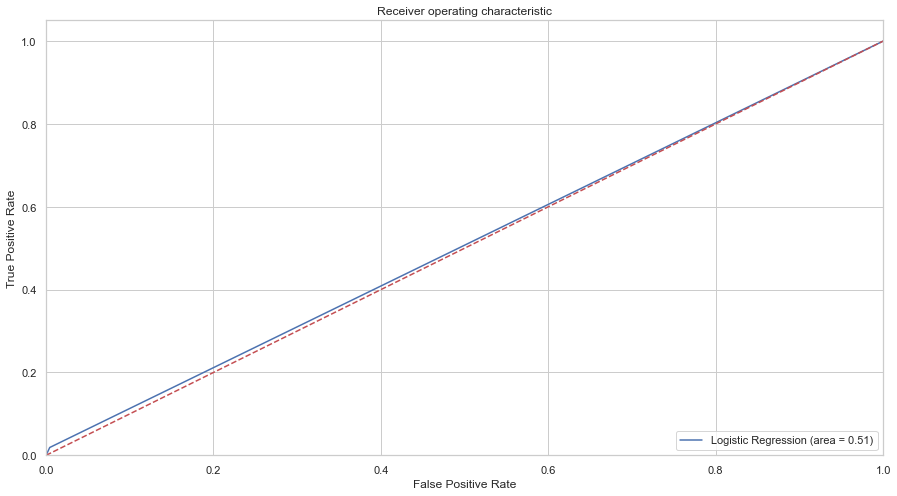

array([[224509,    991],
       [ 52101,   1003]])

In [139]:
from Model_evaluation import Model_evaluation
Model_evaluation(y_test, y_predct_1)

We see that with standard logistic regression we achieve 81% accuracy on the testing data set. We have 81% percision on predicting negative class and 50% predicting positive class correctly. So the model is not bad.

But based on the ROC curve. We see the blue line is only slighlt above the dashed red line. So the model is doing ok not the best. 

#### Logisitc Regression (standard , using Statsmodels.apib)



In [73]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()

         Current function value: 0.443204
         Iterations: 35


/Users/jerry/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [74]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:              1114412
Model:                          Logit   Df Residuals:                  1114291
Method:                           MLE   Df Model:                          120
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.08898
Time:                        00:09:45   Log-Likelihood:            -4.9391e+05
converged:                      False   LL-Null:                   -5.4215e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
loan_amnt                           -1.129e-05   1.91e-06     -5.906      0.000    -1.5e-05   -7.55e-06
term                                    0.0227      0.00

In [75]:
result.pvalues

loan_amnt        3.499963e-09
term             0.000000e+00
int_rate         5.627653e-17
installment      1.803766e-42
emp_length       2.338827e-14
                     ...     
addr_state_VT    4.994141e-09
addr_state_WA    2.175696e-11
addr_state_WI    5.734931e-02
addr_state_WV    6.952302e-08
addr_state_WY    1.313635e-03
Length: 121, dtype: float64

In [76]:
# making predictions
yhat = result.predict(X_test)

y_predict_2 = list(map(round, yhat))

In [77]:
# plot the confusion matirx
confusion_matrix(y_test, y_predict_2)

array([[223708,   1792],
       [ 50858,   2246]])

In [78]:
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    225500
           1       0.56      0.04      0.08     53104

    accuracy                           0.81    278604
   macro avg       0.69      0.52      0.49    278604
weighted avg       0.77      0.81      0.74    278604



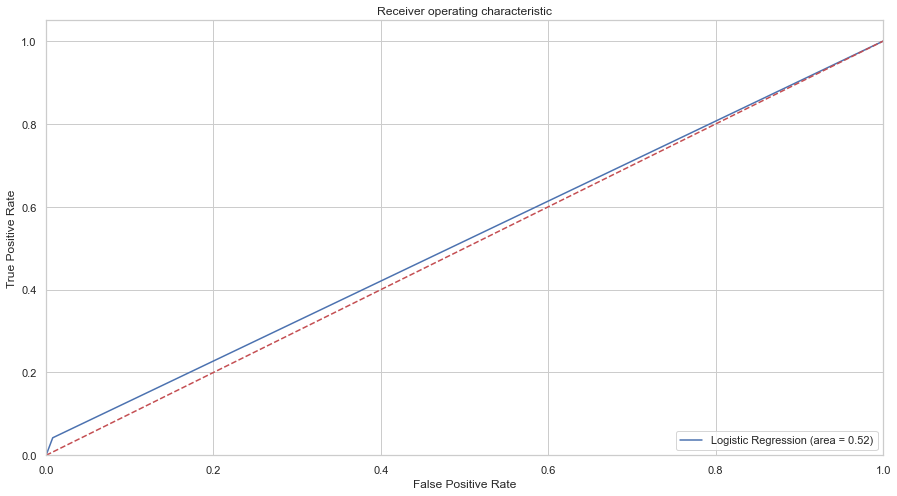

array([[223708,   1792],
       [ 50858,   2246]])

In [138]:
Model_evaluation(y_test, y_predict_2)

We obtained the same results so that makes like the previous graph. That makes sense because both logit model from statsmodel.api and logistic regression from Scikitlearn should do the same thing. 

### Part 3: Logistic Regression

Please finish the codes in Logistic_regression.py. 

#### Method 1: Standard Logistic Regression
##### Training and Predicting 

In [119]:
# Perform the logistic regression
from Logistic_regression import Logistic_regression_function

p_value_lists, results_final = Logistic_regression_function(X_main,y_main)

Optimization terminated successfully.
         Current function value: 0.443545
         Iterations 7


##### Evaluating Method 1 the performance on testing data and make prediction on Unseen data

To evaluate the performance of your model, we use a separate dataset. Again, you should first clean this dataset similar to Part 2.

You may notice, for the test data, you don't have access to the true label. 

Simply output your prediction based on the test data, y_pred, and we will calculate the accuracy for you.

In [121]:
results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:              1393016
Model:                          Logit   Df Residuals:                  1392895
Method:                           MLE   Df Model:                          120
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.08851
Time:                        00:23:53   Log-Likelihood:            -6.1787e+05
converged:                       True   LL-Null:                   -6.7786e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
loan_amnt                           -1.134e-05   1.71e-06     -6.638      0.000   -1.47e-05   -7.99e-06
term                                    0.0229      0.000     46.245      0.000       0.022       0.024
int_rate                                1.8606      0.187      9.957      0.000       1.494       2.227
installment                             0.0008   5.36e-05     15.350      0.000       0.001       0.001
emp_length                             -0.0059      0.001     -9.288      0.000      -0.007      -0.005
annual_inc                          -4.776e-07   5.51e-08     -8.674      0.000   -5.86e-07    -3.7e-07
dti                                     0.0084      0.000     31.955      0.000       0.008       0.009
earliest_cr_line                       -0.0021   5.18e-05    -41.030      0.000      -0.002      -0.002
open_acc                                0.0216      0.001     35.405      0.000       0.020       0.023
pub_rec                                 0.0257      0.005      5.525      0.000       0.017       0.035
revol_bal                           -4.057e-06   1.62e-07    -25.040      0.000   -4.37e-06   -3.74e-06
revol_util                             -0.0003      0.000     -2.650      0.008      -0.000   -7.46e-05
total_acc                              -0.0071      0.000    -23.946      0.000      -0.008      -0.007
mort_acc                               -0.0561      0.002    -34.469      0.000      -0.059      -0.053
pub_rec_bankruptcies                    0.0818      0.008     10.754      0.000       0.067       0.097
sub_grade_A2                            0.2260      0.034      6.704      0.000       0.160       0.292
sub_grade_A3                            0.4334      0.032     13.565      0.000       0.371       0.496
sub_grade_A4                            0.6036      0.029     20.556      0.000       0.546       0.661
sub_grade_A5                            0.7561      0.028     26.655      0.000       0.700       0.812
sub_grade_B1                            0.9208      0.028     33.070      0.000       0.866       0.975
sub_grade_B2                            0.9995      0.028     35.552      0.000       0.944       1.055
sub_grade_B3                            1.1007      0.028     39.001      0.000       1.045       1.156
sub_grade_B4                            1.2110      0.028     42.578      0.000       1.155       1.267
sub_grade_B5                            1.3033      0.029     45.350      0.000       1.247       1.360
sub_grade_C1                            1.4120      0.029     48.290      0.000       1.355       1.469
sub_grade_C2                            1.4954      0.030     49.927      0.000       1.437       1.554
sub_grade_C3                            1.5544      0.031     50.950      0.000       1.495       1.614
sub_grade_C4                            1.6327      0.031     52.326      0.000       1.572       1.694
sub_grade_C5     

In [123]:
# OOS prediction
y_pred_final = results_final.predict(X_unseen)
y_pred_final = y_pred.apply(lambda x: int(x+0.5))

In [126]:
print("there are total of the following positive case")
sum(y_pred_final)

there are total of the following positive case


3990

In [135]:
print("percetnage positive case predicted out of all testing data")
print(sum(y_pred_final)/len(y_pred_final))

percetnage positive case predicted out of all testing data
0.014321402420640048


In [136]:
print("percetnage positive case predicted out of all training data")
print(sum(y_main)/(len(y_main)))

0.1902698892187886


(array([274614.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   3990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

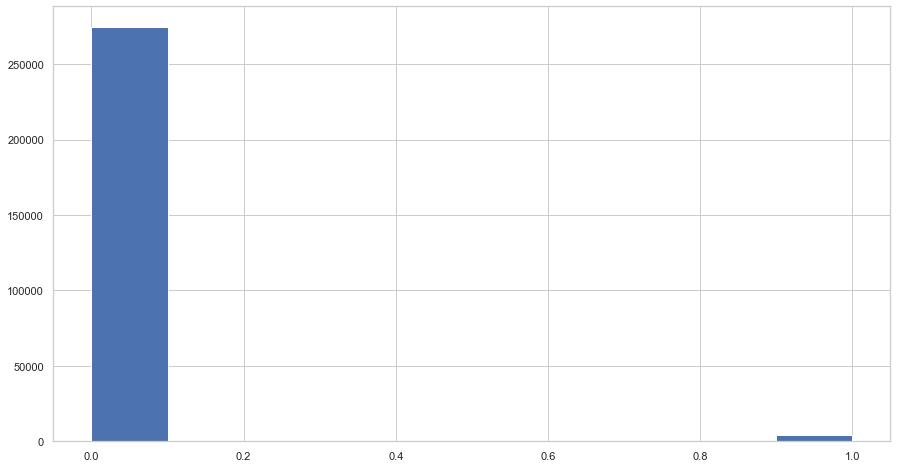

In [134]:
plt.hist(y_pred_final)

In [131]:
final_prediction_on_unseen= pd.DataFrame(y_pred_final)

In [133]:
# Run this to save the data and upload this table.
final_prediction_on_unseen.to_csv('prediction.csv')

**<font color = red>[Bonus question]**: Now it's time to review the results you have obtained. Does your result make sense? If not, what problems do you find, and any ideas about how to fix them?
    
**Answer**:
    
The result doesn't make the best sense. Because we are given an imbalanced dataset about 19% of the training data is positive, with a lot more negative label than positive label. However when we predict on the testing data. We only got a little more than 1% of prediction as positive. There seems to be a disparity there 
    
We can fix this problem by training the logistic model differently. Because we are dealing with an imbalanced data of 19% positive label. 
    
First, We can assign greater class weight to the logsitic model training. 
    
Second, we can downsample lots of the negative label samples to reduce the negative labels. 

Third, we can upsample the positive label to increase the percentage of positive labels. 